In [39]:
import matplotlib.pyplot as plt
import pandas as pd

df1 = pd.read_csv('dfm-experiments-split-1.csv')
df2 = pd.read_csv('dfm-experiments-split-2.csv')
dfm = pd.read_csv('dfm-experiments.csv')

In [40]:
dfm["solved"] = dfm["lower_bound"] == dfm["incumbent"]

In [41]:
df1.columns

Index(['name', 'warmstart', 'lb1_start', 'lb5_start', 'incumbent',
       'lower_bound', 'execution_time', 'gap', 'nodes', 'sequence'],
      dtype='object')

In [42]:
df_n = pd.merge(
    df1[["name", "nodes"]],
    df2[["name", "nodes"]],
    on="name", suffixes=('_1', '_2')
)

In [43]:
df_out = pd.merge(
    dfm[["name", "nodes", "solved"]],
    df_n, on="name"
)
df_out.query("solved == True", inplace=True)
df_out["nodes_fs"] = df_out[["nodes_1", "nodes_2"]].max(axis=1)

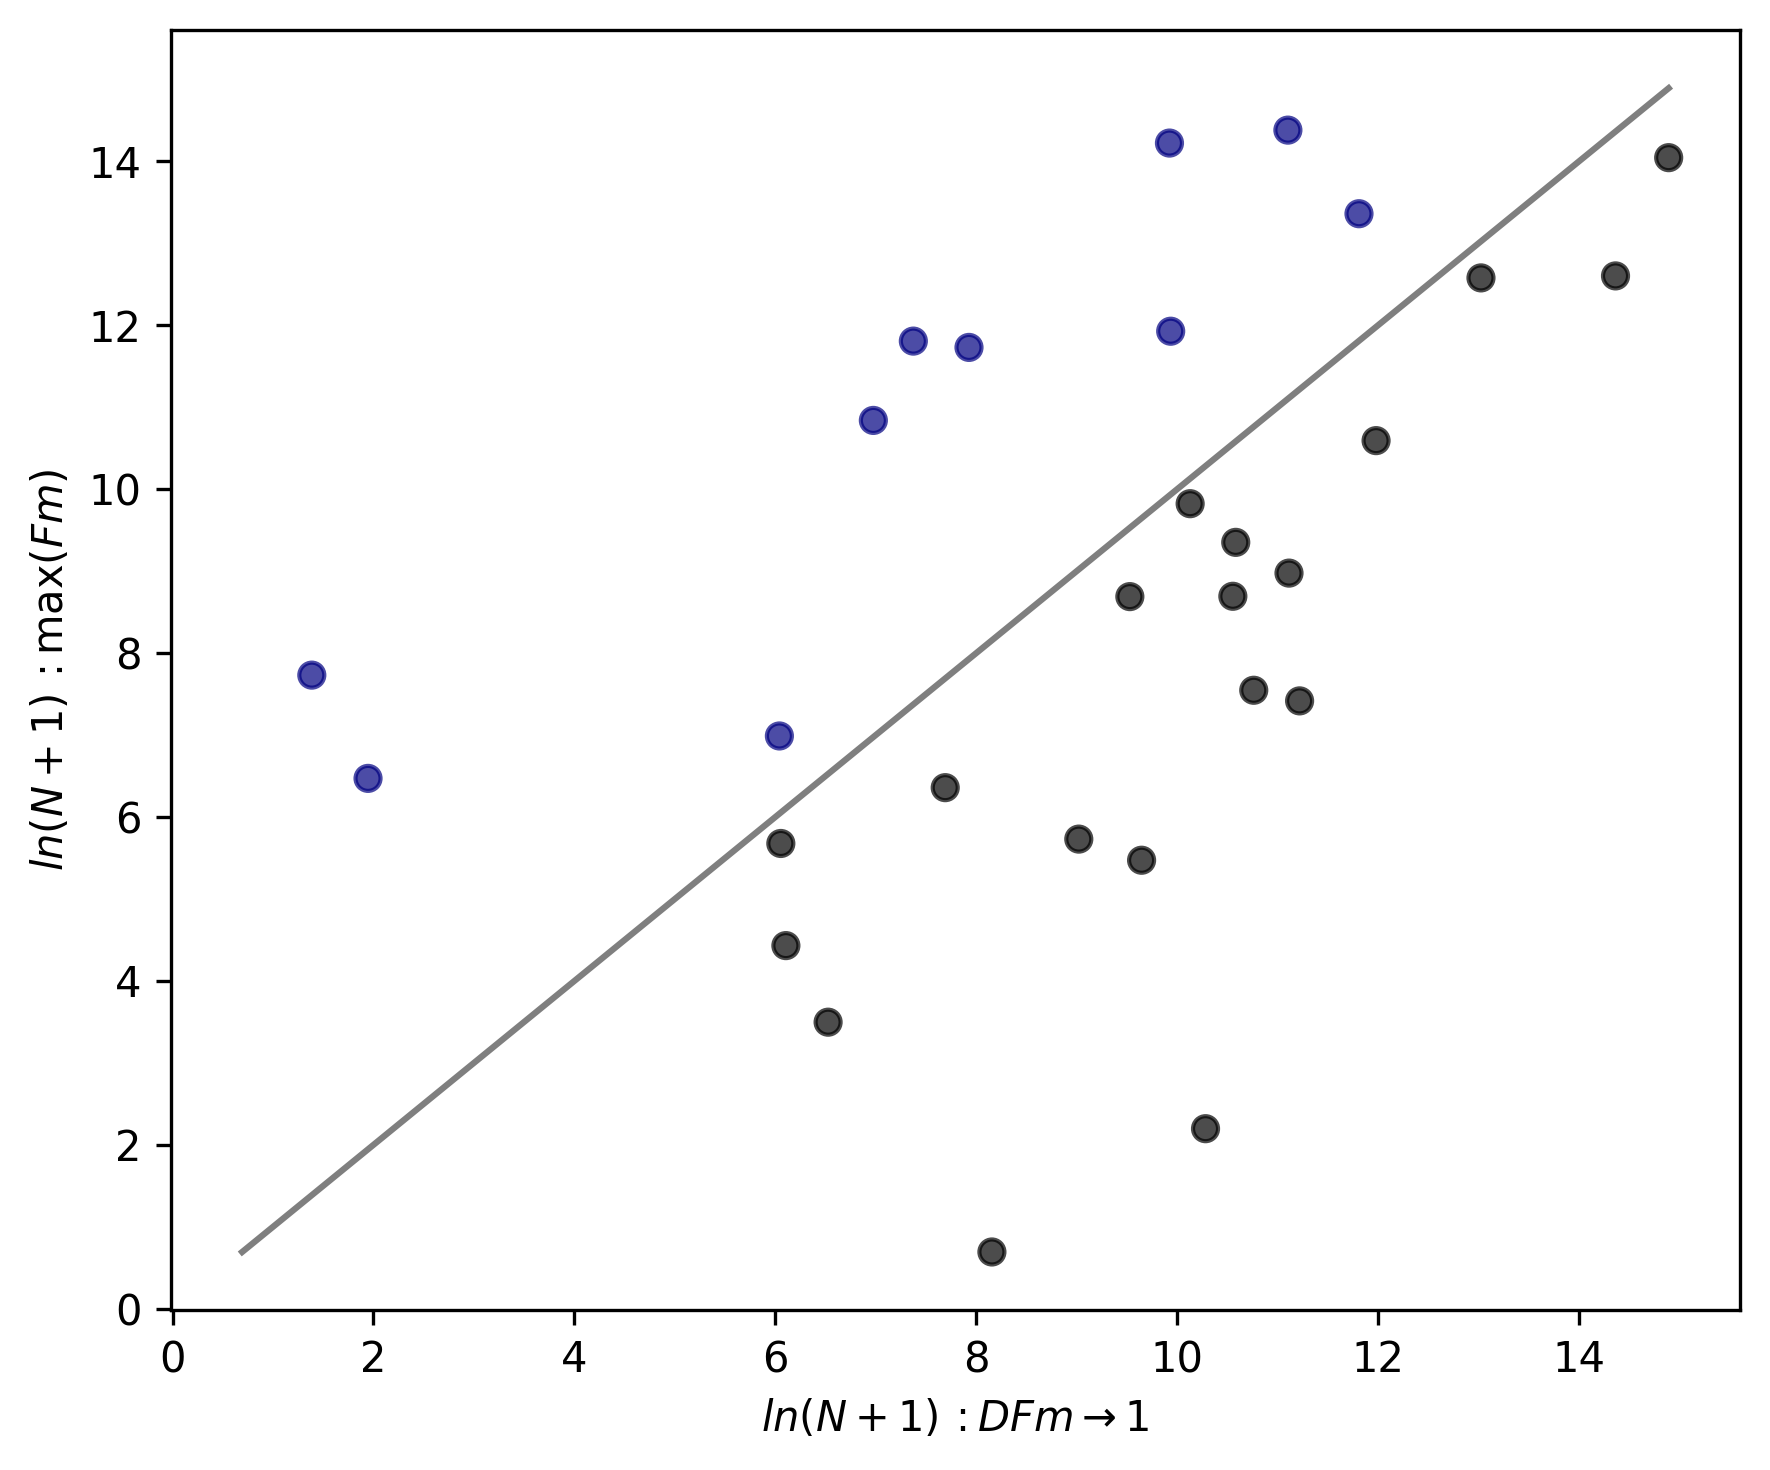

In [46]:
import numpy as np

fig, ax = plt.subplots(figsize=(6, 5), dpi=300)

colors = [
    'navy' if n2 > n5 else 'black'
    for n2, n5 in zip(df_out['nodes_fs'], df_out['nodes'])
]
ax.scatter(
    np.log1p(df_out['nodes']),
    np.log1p(df_out['nodes_fs']),
    alpha=0.7,
    c=colors,
)
min_val = min(
    np.log1p(df_out['nodes'].min()), np.log1p(df_out['nodes_fs'].min())
)
max_val = max(
    np.log1p(df_out['nodes'].max()), np.log1p(df_out['nodes_fs'].max())
)
ax.plot(
    [min_val, max_val],
    [min_val, max_val],
    color='black',
    linestyle='-',
    alpha=0.5,
)
ax.set_xlabel(r'$ln(N + 1) \, : DFm \rightarrow 1 $')
ax.set_ylabel(r'$ln(N + 1) \, : \max(Fm) $')
fig.tight_layout()
plt.savefig('nodes-dfm.pdf', bbox_inches='tight')
plt.show()

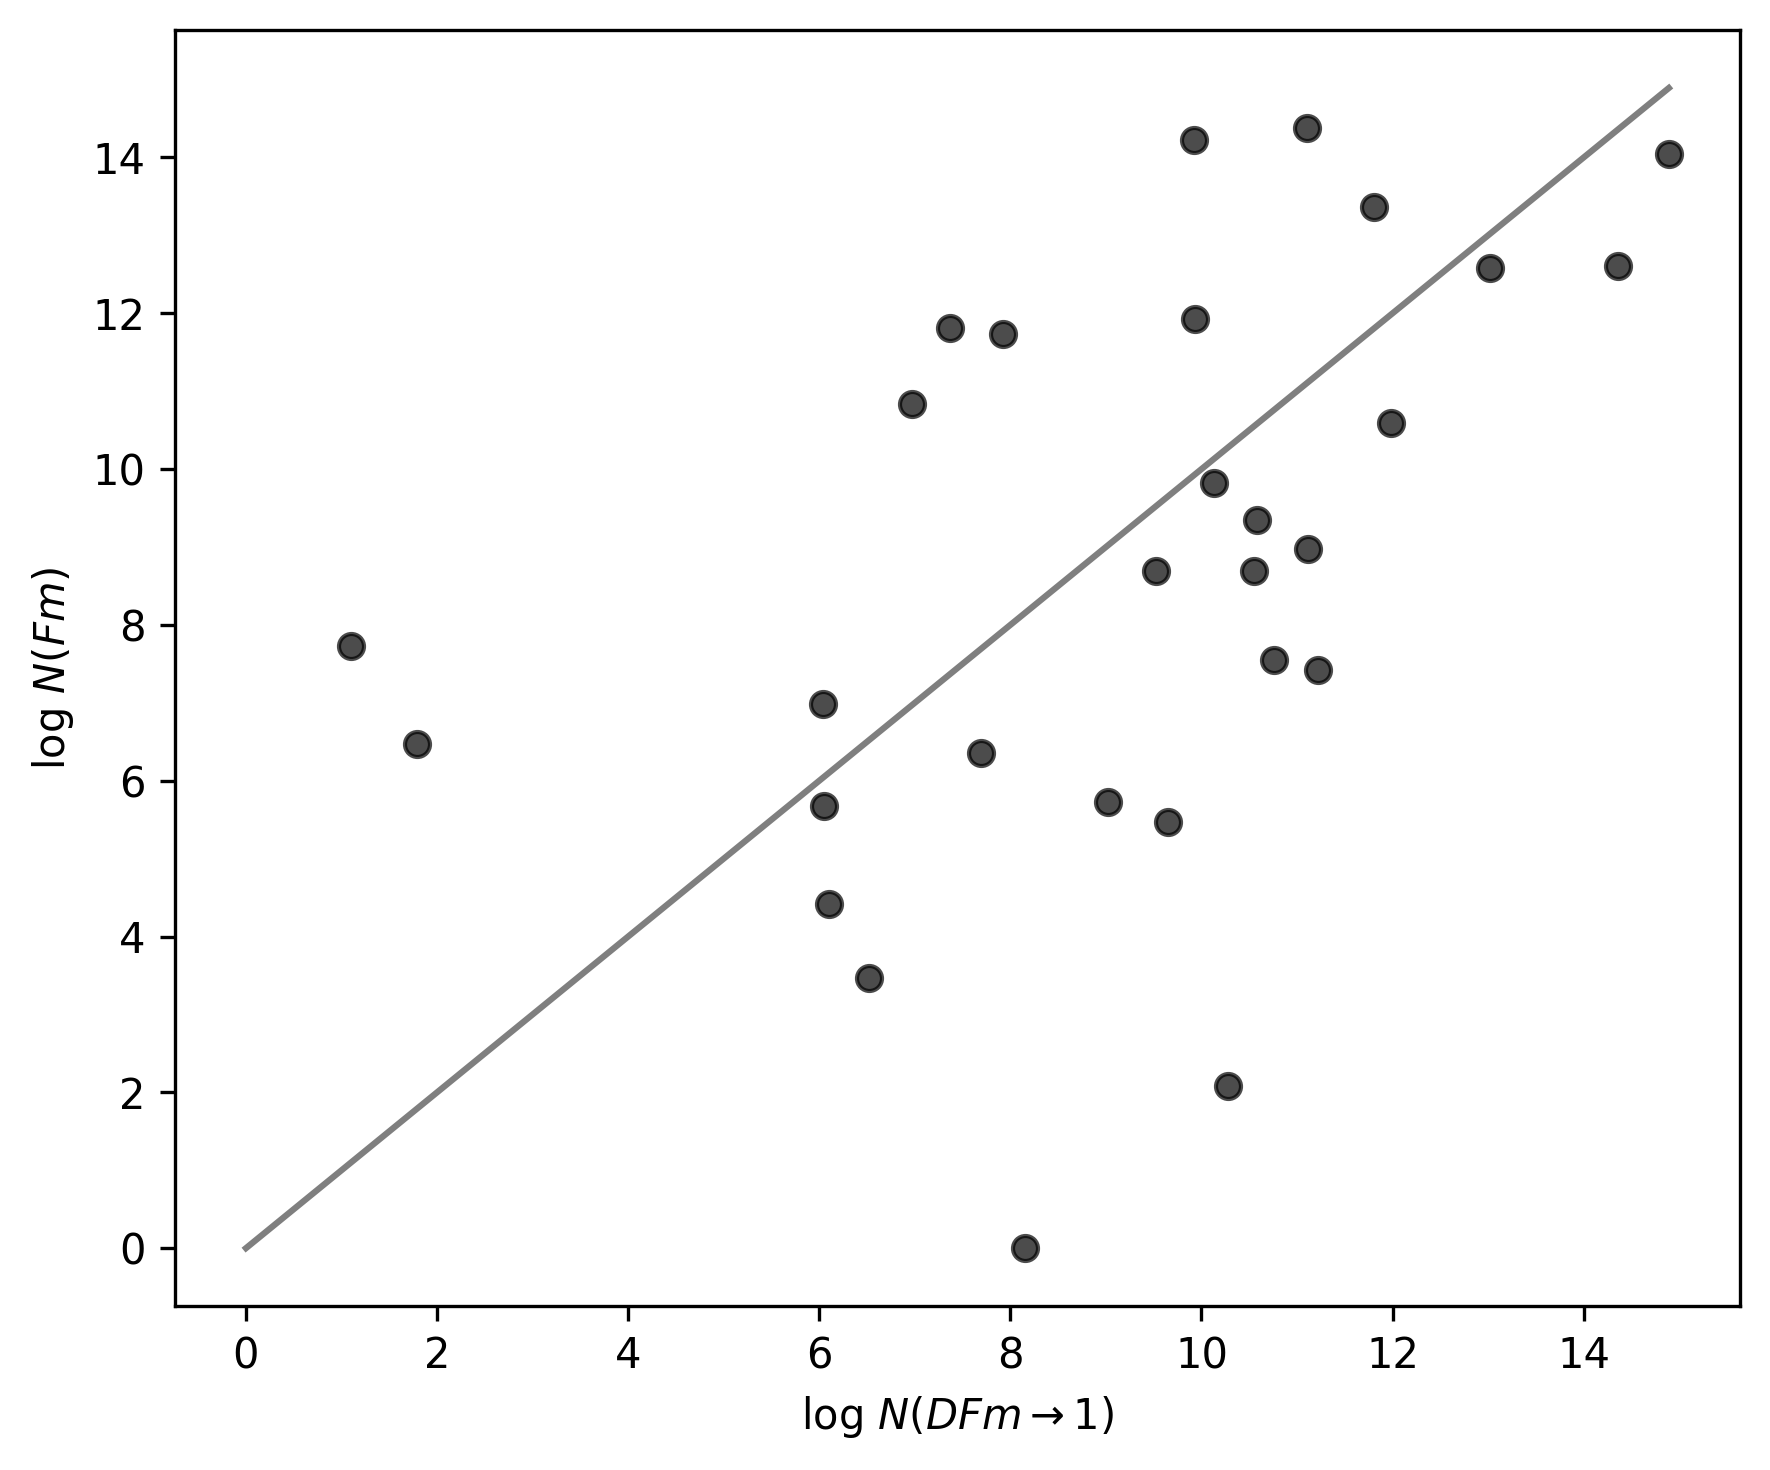

In [ ]:
import numpy as np

fig, ax = plt.subplots(figsize=(6, 5), dpi=300)
ax.scatter(
    np.log1p(df_out['nodes']),
    np.log1p(df_out['nodes_fs']),
    alpha=0.7,
    c='black',
)
min_val = min(
    np.log1p(df_out['nodes'].min()), np.log1p(df_out['nodes_fs'].min())
)
max_val = max(
    np.log1p(df_out['nodes'].max()), np.log1p(df_out['nodes_fs'].max())
)
ax.plot(
    [min_val, max_val],
    [min_val, max_val],
    color='black',
    linestyle='-',
    alpha=0.5,
)
ax.set_xlabel(r'log $N(DFm \rightarrow 1)$')
ax.set_ylabel('log $N(Fm)$')
fig.tight_layout()
plt.savefig('early-pruning.pdf', bbox_inches='tight')
plt.show()

In [8]:
pd.merge(
    dfm[["name", "nodes"]],
    df_n, on="name"
).agg(
    {
        'nodes': 'median',
        'nodes_1': 'median',
        'nodes_2': 'median'
    }
)

nodes      3478.5
nodes_1       6.0
nodes_2    1372.5
dtype: float64